# Importing The Data

In [156]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statistics import mean
from sklearn.preprocessing import StandardScaler

In [157]:
train_data = pd.read_csv('Train.csv')
test_data = pd.read_csv('Test.csv')
riders_data = pd.read_csv('Riders.csv')

In [158]:
# Create a copy of the DataFrame
train_df = train_data.copy()

# Exploratory  Data Analysis

## Understanding The Data

In [159]:
# Check datatypes of each column
train_df.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

In [160]:
riders_data.dtypes

Rider Id           object
No_Of_Orders        int64
Age                 int64
Average_Rating    float64
No_of_Ratings       int64
dtype: object

In [161]:
# Check the statistical summary of the dataframe
train_df.describe() 

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


In [162]:
riders_data.describe()

,No_Of_Orders,Age,Average_Rating,No_of_Ratings
count,960.000000,960.000000,960.000000,960.000000
mean,1864.851042,1200.234375,13.412604,427.983333
std,1880.337785,810.930171,2.675794,486.957931
min,2.000000,96.000000,0.000000,0.000000
25%,261.750000,478.250000,13.500000,30.000000
50%,1475.500000,1021.000000,14.000000,223.000000
75%,2847.250000,1891.500000,14.300000,678.750000
max,9756.000000,3764.000000,15.200000,2298.000000


## Dealing With Missing Data

In [163]:
# Check for null values
train_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null int64
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null int64
Placement - Weekday (Mo = 1)                 21201 non-null int64
Placement - Time                             21201 non-null object
Confirmation - Day of Month                  21201 non-null int64
Confirmation - Weekday (Mo = 1)              21201 non-null int64
Confirmation - Time                          21201 non-null object
Arrival at Pickup - Day of Month             21201 non-null int64
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null int64
Arrival at Pickup - Time   

In [164]:
riders_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
Rider Id          960 non-null object
No_Of_Orders      960 non-null int64
Age               960 non-null int64
Average_Rating    960 non-null float64
No_of_Ratings     960 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


In [165]:
# Replace null values with the mean of the columns
# The Temperature and Precipitation columns had null values
train_df = train_df.fillna(train_df.mean())

In [166]:
# One of the Rider Id rows contains a NaN value
# The entire row with the missing value was removed
train_df.dropna(inplace = True) 

In [167]:
# Check for null values again.
# There are no longer any null values
train_df.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 29 columns):
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null int64
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null int64
Placement - Weekday (Mo = 1)                 21201 non-null int64
Placement - Time                             21201 non-null object
Confirmation - Day of Month                  21201 non-null int64
Confirmation - Weekday (Mo = 1)              21201 non-null int64
Confirmation - Time                          21201 non-null object
Arrival at Pickup - Day of Month             21201 non-null int64
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null int64
Arrival at Pickup - Time   

'There are no longer any null values'

## Join The Riders And Train Datasets

In [168]:
df = pd.merge(train_df, riders_data, on  = 'Rider Id')
df.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),...,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,...,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549
1,Order_No_27440,User_Id_2642,Bike,3,Personal,18,5,3:41:17 PM,18,5,...,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,2886,1637,1309,13.8,549
2,Order_No_14170,User_Id_3339,Bike,3,Business,31,5,12:51:41 PM,31,5,...,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,2615,1637,1309,13.8,549
3,Order_No_21727,User_Id_3523,Bike,3,Personal,2,2,7:12:10 AM,2,2,...,-1.290315,36.757377,-1.223520,36.802061,Rider_Id_432,2986,1637,1309,13.8,549
4,Order_No_8301,User_Id_87,Bike,2,Personal,22,2,10:40:58 AM,22,2,...,-1.273524,36.799220,-1.300431,36.752427,Rider_Id_432,1602,1637,1309,13.8,549


## Analyse The Joined Datasets

In [169]:
# Understanding the different data-types within the data
df.dtypes

Order No                                      object
User Id                                       object
Vehicle Type                                  object
Platform Type                                  int64
Personal or Business                          object
Placement - Day of Month                       int64
Placement - Weekday (Mo = 1)                   int64
Placement - Time                              object
Confirmation - Day of Month                    int64
Confirmation - Weekday (Mo = 1)                int64
Confirmation - Time                           object
Arrival at Pickup - Day of Month               int64
Arrival at Pickup - Weekday (Mo = 1)           int64
Arrival at Pickup - Time                      object
Pickup - Day of Month                          int64
Pickup - Weekday (Mo = 1)                      int64
Pickup - Time                                 object
Arrival at Destination - Day of Month          int64
Arrival at Destination - Weekday (Mo = 1)     

In [170]:
# Group data by Rider Id to show how the averages correlate
# Drop all object type data
# Group by Rider Id recording the mean value of each column for the riders.
df_grp = df.drop(['Order No', 'User Id', 'Vehicle Type', 'Personal or Business', 
                  'Placement - Time','Confirmation - Time','Arrival at Pickup - Time', 
                  'Pickup - Time', 'Arrival at Destination - Time' ], axis = 1)
df_grp = df_grp.groupby('Rider Id').mean()
df_grp.head()

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
Rider Id,,,,,,,,,,,,,,,,,,,,,
Rider_Id_0,3.000000,4.000000,1.000000,4.000000,1.000000,4.000000,1.000000,4.000000,1.000000,4.000000,...,7.905797,-1.329285,36.886785,-1.300921,36.828195,1393.000000,3048.0,2570.0,14.0,512.0
Rider_Id_1,3.000000,19.000000,5.000000,19.000000,5.000000,19.000000,5.000000,19.000000,5.000000,19.000000,...,7.905797,-1.320715,36.830577,-1.299323,36.775337,1333.000000,8.0,589.0,0.0,1.0
Rider_Id_10,3.000000,18.078431,3.607843,18.078431,3.607843,18.078431,3.607843,18.078431,3.607843,18.078431,...,7.797499,-1.310236,36.825240,-1.294703,36.800791,529.098039,6978.0,1990.0,13.3,413.0
Rider_Id_100,2.484848,14.222222,3.252525,14.222222,3.252525,14.222222,3.252525,14.222222,3.252525,14.222222,...,7.627727,-1.281512,36.813023,-1.276978,36.814100,1271.929293,362.0,910.0,13.4,109.0
Rider_Id_101,2.469945,16.612022,3.311475,16.612022,3.311475,16.612022,3.311475,16.612022,3.311475,16.612022,...,7.789855,-1.269583,36.803790,-1.280071,36.808981,1755.579235,1299.0,986.0,13.1,287.0


,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,...,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
Platform Type,1.000000,-0.018958,-0.091786,-0.018951,-0.091748,-0.018951,-0.091748,-0.018951,-0.091748,-0.018951,...,-0.039997,0.018723,0.041415,0.006984,0.035244,0.032976,0.015274,-0.103566,-0.076152,-0.055286
Placement - Day of Month,-0.018958,1.000000,0.002623,1.000000,0.002666,1.000000,0.002666,1.000000,0.002666,1.000000,...,-0.057245,0.030950,0.018550,-0.031019,-0.022392,-0.084348,0.000913,0.058926,0.068957,-0.013309
Placement - Weekday (Mo = 1),-0.091786,0.002623,1.000000,0.002622,0.999998,0.002622,0.999998,0.002622,0.999998,0.002622,...,-0.027884,0.042922,-0.042164,0.095851,-0.035805,0.100776,-0.110124,-0.105079,-0.022697,-0.108984
Confirmation - Day of Month,-0.018951,1.000000,0.002622,1.000000,0.002665,1.000000,0.002665,1.000000,0.002665,1.000000,...,-0.057246,0.030961,0.018544,-0.031015,-0.022392,-0.084341,0.000912,0.058915,0.068961,-0.013317
Confirmation - Weekday (Mo = 1),-0.091748,0.002666,0.999998,0.002665,1.000000,0.002665,1.000000,0.002665,1.000000,0.002665,...,-0.027893,0.042989,-0.042199,0.095878,-0.035806,0.100813,-0.110127,-0.105141,-0.022671,-0.109029
Arrival at Pickup - Day of Month,-0.018951,1.000000,0.002622,1.000000,0.002665,1.000000,0.002665,1.000000,0.002665,1.000000,...,-0.057246,0.030961,0.018544,-0.031015,-0.022392,-0.084341,0.000912,0.058915,0.068961,-0.013317
Arrival at Pickup - Weekday (Mo = 1),-0.091748,0.002666,0.999998,0.002665,1.000000,0.002665,1.000000,0.002665,1.000000,0.002665,...,-0.027893,0.042989,-0.042199,0.095878,-0.035806,0.100813,-0.110127,-0.105141,-0.022671,-0.109029
Pickup - Day of Month,-0.018951,1.000000,0.002622,1.000000,0.002665,1.000000,0.002665,1.000000,0.002665,1.000000,...,-0.057246,0.030961,0.018544,-0.031015,-0.022392,-0.084341,0.000912,0.058915,0.068961,-0.013317
Pickup - Weekday (Mo = 1),-0.091748,0.002666,0.999998,0.002665,1.000000,0.002665,1.000000,0.002665,1.000000,0.002665,...,-0.027893,0.042989,-0.042199,0.095878,-0.035806,0.100813,-0.110127,-0.105141,-0.022671,-0.109029
Arrival at Destination - Day of Month,-0.018951,1.000000,0.002622,1.000000,0.002665,1.000000,0.002665,1.000000,0.002665,1.000000,...,-0.057246,0.030961,0.018544,-0.031015,-0.022392,-0.084341,0.000912,0.058915,0.068961,-0.013317


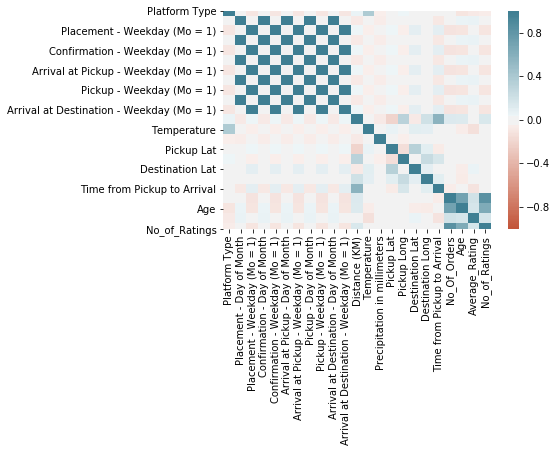

In [171]:
#Heatmap and correlation table of grouped dataset
corr = df_grp.corr()
ax = sns.heatmap(corr, cmap = sns.diverging_palette(20, 220, n=200),  vmax = 1, vmin = -1 , center = 0 )
corr

## Scatter Plot Analysis

In [172]:
#Function used to determine the slope of the best fit line
def best_fit_slope(X,y):
    m = ((mean(X) * mean(y)) - mean(X * y))/ ((mean(X)**2) - (mean(X**2)))
    return m

In [173]:
#Function used to determine y-intercept of best fit line
def best_fit_yintercept(X, y, m):
    b = mean(y) - (m*mean(X))
    return b

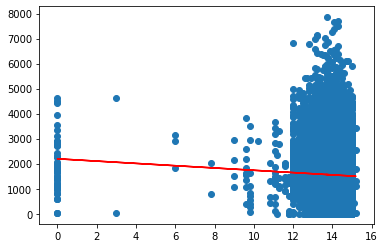

In [174]:
X = df['Average_Rating']
y = df['Time from Pickup to Arrival']
m = best_fit_slope(X,y)
b = best_fit_yintercept(X, y, m)
y_line = m*X + b
plt.plot(X, y_line,color = 'red')
plt.scatter(X, y)

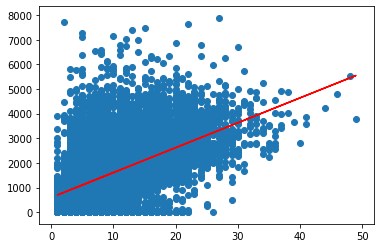

In [175]:
X = df['Distance (KM)']
y = df['Time from Pickup to Arrival']
m = best_fit_slope(X,y)
b = best_fit_yintercept(X, y, m)

y_line = m*X + b
plt.plot(X, y_line, color = 'red')
plt.scatter(X, y)

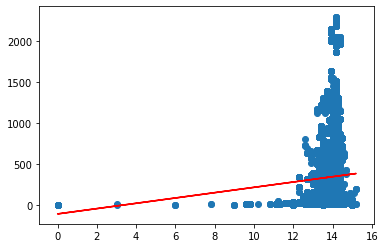

In [176]:
X = df['Average_Rating']
y = df['No_of_Ratings']
m = best_fit_slope(X, y)
b = best_fit_yintercept(X, y, m)

y_line = m*X + b
plt.plot(X, y_line, color='red')
plt.scatter(X, y)

## Box Plot Analysis

This boxplot shows the average time each delivery took is the same for every platform, therefore using this variable in our regression model would prove
to be pointless


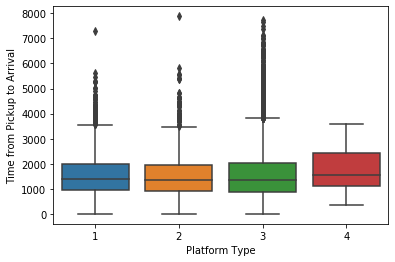

In [177]:
sns.boxplot( x = 'Platform Type', y = 'Time from Pickup to Arrival', data = df)
print("""This boxplot shows that the average time each delivery took is the same for 
        every platform, therefore using this variable in our regression model would prove
        to be pointless""")

## Residual Plot Analysis

Signs of heteroscedascity can be seen in the plots above and below. 
 Nonlinear models appropriate for these relationships.


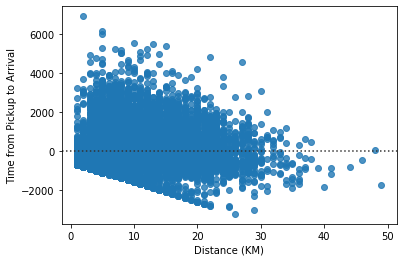

In [178]:
# If residuals are randomly spread out around x-axis then a linear model is appropriate.
# Not randomly spread around the x-axis means linear model is not appropriate. Non-linear model may be appropriate.

sns.residplot(df['Distance (KM)'], df['Time from Pickup to Arrival'])
print("""Signs of heteroscedascity can be seen in the plots above and below. 
        Nonlinear models are appropriate for these relationships.""")

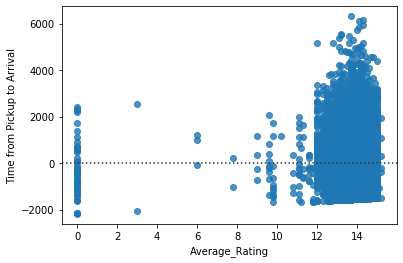

In [179]:
sns.residplot(df['Average_Rating'], df['Time from Pickup to Arrival'])

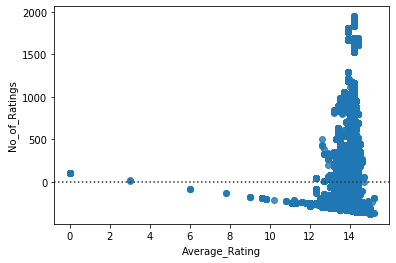

In [180]:
sns.residplot(df['Average_Rating'], df['No_of_Ratings'])

## Extra Plots

We can see that there is a strong correlation between these two variables


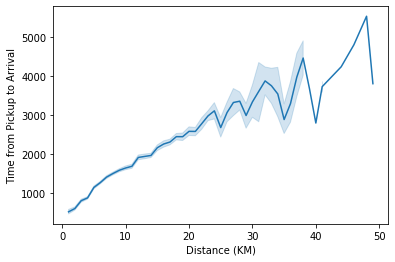

In [181]:
sns.lineplot(df['Distance (KM)'], df['Time from Pickup to Arrival'])
print("We can see that there is a strong correlation between these two variables")

## Summary

#### Two columns in the data set had missing values, those were filled in using the mean of each column. The average amount of time taken from pickup to delivery is the same across all platforms so this column does not provide extra information. The variable with the most correlation to the predictor variable (Time from Pickup to Arrival) is the "Distance" variable, therefore we will use it in our model.

#### We will train various models and use the model with the lowest RMSE.
# ------------------------------------------------------------------------------------------------------------

# Pre-processing
## Shaping and Forming x and y

In [182]:
train_df = train_data[['Distance (KM)', 'Time from Pickup to Arrival']]

In [183]:
# Create the X and y variables from the dataset
x = train_df.iloc[:, :-1].values
y = train_df.iloc[:, -1].values

In [184]:
# Re-shape x and y into a 2D array
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)
print(x,y)
print("\n This is the correct form for the variables")

[[ 4]
 [16]
 [ 3]
 ...
 [20]
 [13]
 [12]] [[ 745]
 [1993]
 [ 455]
 ...
 [2953]
 [1380]
 [2128]]

 This is the correct form for the variables


## Scaling

In [185]:
# We need to scale the data 
# We will use Sklean's StandardScaler for this
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()
x = sc_X.fit_transform(x)
y = sc_y.fit_transform(y)

print(x,y)
print("\n Variables scaled correctly")

[[-0.97137039]
 [ 1.14546888]
 [-1.14777366]
 ...
 [ 1.85108197]
 [ 0.61625906]
 [ 0.43985579]] [[-0.82240871]
 [ 0.44171198]
 [-1.11615471]
 ...
 [ 1.41411252]
 [-0.17920627]
 [ 0.57845581]]

 Variables scaled correctly


# SVR Model
### Our first attempt will be to try and use an SVR model
## Training

In [186]:
from sklearn.svm import SVR

svr_regressor = SVR(kernel = 'rbf')
svr_regressor.fit(x, y)

C:\Users\front\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

## Predicting  

In [187]:
predicts = sc_y.inverse_transform(svr_regressor.predict(sc_X.transform(x)))

In [188]:
from sklearn.metrics import mean_squared_error
print("RMSE: ", np.sqrt(mean_squared_error(y,predicts)))

RMSE:  448.356006565585


# Random Forest Regressor
## Pre-Processing

In [189]:
tr_df = train_data.copy()

tr_df1 = tr_df.drop(['Order No', 'User Id', 'Vehicle Type', 'Personal or Business',
                     'Placement - Time', 'Confirmation - Time', 'Arrival at Pickup - Time',
                     'Pickup - Time', 'Arrival at Destination - Time', 'Precipitation in millimeters',
                     'Temperature', 'Rider Id', 'Pickup Lat', 'Pickup Long', 'Destination Lat', 'Destination Long',
                     'Arrival at Destination - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month'], axis=1)

In [190]:
ts_df = test_data.copy()

ts_df1 = ts_df.drop(['Order No', 'User Id', 'Vehicle Type','Personal or Business' ,
                     'Placement - Time', 'Confirmation - Time','Arrival at Pickup - Time', 
                     'Pickup - Time', 'Precipitation in millimeters', 'Temperature', 'Rider Id',
                     'Pickup Lat','Pickup Long', 'Destination Lat','Destination Long' ], axis=1)
ts_df1['Time from pickup to arrival'] = range(len(ts_df['Platform Type']))

predvar = ts_df1.iloc[:, -2:-1].values

In [191]:

rf_X = tr_df1.iloc[: , -2:-1].values
rf_y = tr_df1.iloc[: , -1].values

In [192]:
rf_X = rf_X.reshape(-1,1)
rf_y= rf_y.reshape(-1,1)

rf_X = sc_X.fit_transform(rf_X)
rf_y = sc_y.fit_transform(rf_y)

## Training

In [193]:
from sklearn.ensemble import RandomForestRegressor

regressorRFR = RandomForestRegressor()
regressorRFR.fit(rf_X, rf_y)

C:\Users\front\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\front\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

## Predicting

In [194]:
RFRpreds = sc_y.inverse_transform(regressorRFR.predict(sc_X.transform(predvar)))
print("RMSE: ", np.sqrt(mean_squared_error(predvar,RFRpreds)))

RMSE:  1643.719545098379


# Linear Model

## Training

In [195]:
# No need to pre-process the data this time as it has already been pre-processed to the desired from
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [196]:
predicts_lin = sc_y.inverse_transform(regressor.predict(sc_X.transform(x)))

from sklearn import metrics

print("RMSE: ", np.sqrt(mean_squared_error(y,predicts_lin)))

RMSE:  604.0926975240357


# Summary

As we can see the model with the best fit is the random forest regressor this is the model we will use to build our API and can predict Values closely resembling the actual values.
We will use that model to convert into a csv

### Submitting to Zindi, creating an CSV file
#### Don't run this code if not wanting to create a CSV file

In [198]:
# Run this code only if wanting to create a CSV, we did this so we could submit to Zindi

ts_df['Time from pickup to arrival'] = RFRpreds
newer = ts_df[['Order No', 'Time from pickup to arrival']]
newer.to_csv("28_Predict.csv", index=False)
newer

,Order No,Time from pickup to arrival
0,Order_No_19248,1481.224930
1,Order_No_12736,1128.815230
2,Order_No_768,1128.815230
3,Order_No_15332,1128.815230
4,Order_No_21373,1250.796593
...,...,...
7063,Order_No_3612,1128.815230
7064,Order_No_7657,2746.712193
7065,Order_No_1969,1638.836802
7066,Order_No_10591,2444.936472
